This scripts aims at analyzing the output of the CMD tuned for natural products: correctness, diversity and novelty. Two iterations are used: first, 50K compounds are used as training set, and then the whole set of natural products of ZINC12. This is a version of Exp3Analysis for a run of the cmd with z=200

In [1]:
# Import myfunc at cix folder
%matplotlib inline
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../cix')
import myfuncs as mf
import pandas as pd
from rdkit import rdBase
rdBase.DisableLog('rdApp.*') # To make rdkit silent
from rdkit.Chem import PandasTools as pt
from rdkit.Chem import Descriptors
import numpy as np
import time

/home/gonzalo/anaconda3/envs/cix/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
#######################################
### Unconditional CMD output molecules
#######################################

# Init the time counter for the whole notebook
start = time.time()

it = [50000, 81661]

df_un, cls_un = mf.wholean(it = it, name_train = "train", name_pref = "z200unc")

Clustering time: 00:00:03
Diversity analysis time: 00:01:46
Clustering time: 00:00:00
Diversity analysis time: 00:00:09
Arenas creation time: 00:00:00
Novelty analysis time: 00:01:50
Clustering time: 00:00:05
Diversity analysis time: 00:03:10
Clustering time: 00:00:00
Diversity analysis time: 00:00:10
Arenas creation time: 00:00:00
Novelty analysis time: 00:03:08


In [3]:
# Show the results in the output dataframe

df_un

,# train,%corr inp,# clus inp,# fram inp,# gen fram inp,# out,%corr out,# clus out,# fram out,# gen fram out,% new str,% new fram,% new gen fram
1,50000.0,100.0,10222.0,15128.0,32105.0,5000.0,97.72,1149.0,1501.0,2256.0,3.09,10.06,17.15
2,81661.0,100.0,13517.0,22207.0,52264.0,5000.0,95.76,1395.0,1617.0,2570.0,2.78,9.77,16.61


In [4]:
# Save the results

df_un.to_csv("analysis1z200-NP-un.csv")

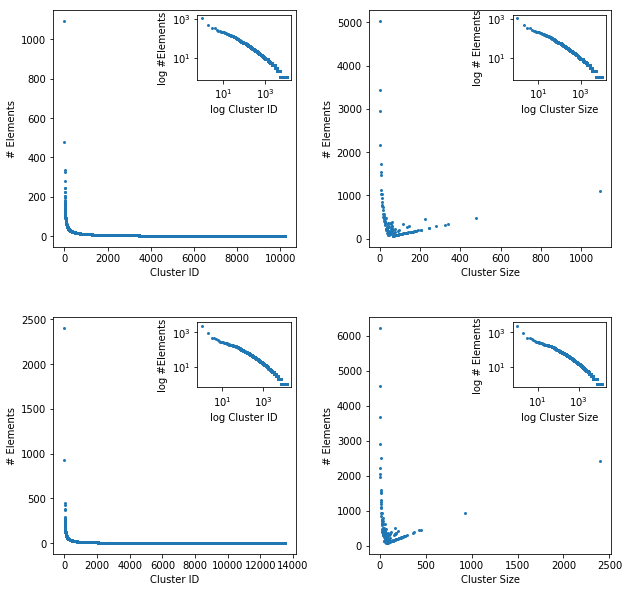

In [5]:
# Plot the clusters distributions and cluster size distribution
mf.plotmulticlus(cls_un, 10, 10)

In [6]:
#######################################
### Conditional CMD output molecules
#######################################

df_co, cls_co = mf.wholean(it = it, name_train = "train", name_pref = "z200con")

Clustering time: 00:00:02
Diversity analysis time: 00:01:43
Clustering time: 00:00:00
Diversity analysis time: 00:00:06
Arenas creation time: 00:00:00
Novelty analysis time: 00:01:45
Clustering time: 00:00:07
Diversity analysis time: 00:02:55
Clustering time: 00:00:00
Diversity analysis time: 00:00:06
Arenas creation time: 00:00:00
Novelty analysis time: 00:02:54


In [7]:
# Show the results dataframe

df_co

,# train,%corr inp,# clus inp,# fram inp,# gen fram inp,# out,%corr out,# clus out,# fram out,# gen fram out,% new str,% new fram,% new gen fram
1,50000.0,100.0,10222.0,15128.0,32105.0,5000.0,98.92,816.0,677.0,1181.0,4.69,17.87,26.50
2,81661.0,100.0,13517.0,22207.0,52264.0,5000.0,95.24,654.0,500.0,874.0,3.57,19.20,32.15


In [8]:
# Save the results dataframe

df_co.to_csv("analysis1z200-NP-co.csv")

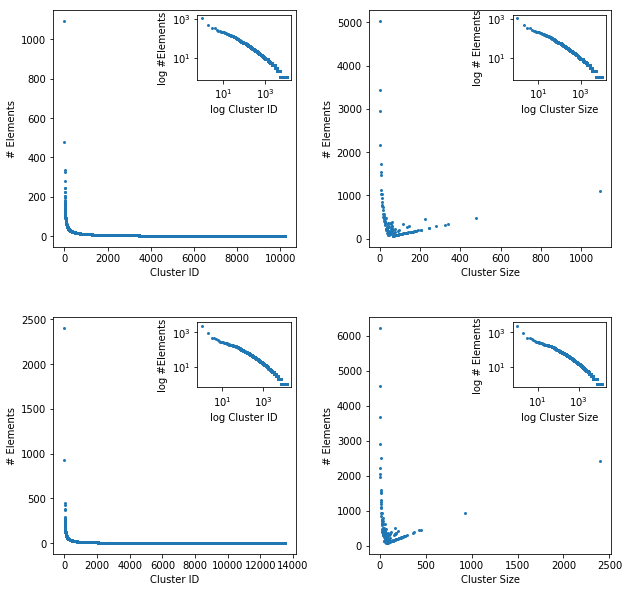

In [9]:
# Plot the clusters distributions and cluster size distribution

mf.plotmulticlus(cls_co, 10, 10)

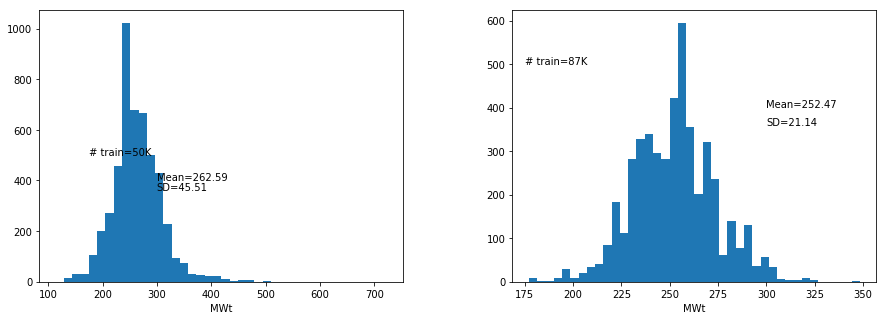

In [10]:
### Plot the bunch of histograms of mwt
it = [50000, 81661]
mwts = []

for n in it:
    smis = mf.smif2smis('./z200con' + str(n) + '.smi')
    ncorr, n, smis, wrongsmis = mf.corrsmis(smis)
    smidf = mf.smis2smidf(smis)
    pt.AddMoleculeColumnToFrame(smidf,"smiles")
    smidf['mw'] = smidf['ROMol'].map(Descriptors.MolWt)
    del smidf["ROMol"]
    mwts.append(list(smidf['mw']))

leg = ["# train=50K","# train=87K"] 

mf.paintmultihist(mwts, "MWt", 1, 2, 300, 400, 15, 5, 175, 500, leg)

In [11]:
# End the time counter for the whole notebook
end = time.time()
eltime = end - start
print('Exp4nalysis execution time: ' + time.strftime("%H:%M:%S", time.gmtime(eltime)))

Exp4nalysis execution time: 00:31:35
